# CAIS++ Linear Regression Workshop
Before you go through this code, make sure you read [Lesson 2](http://caisplusplus.usc.edu/blog/curriculum/lesson2) from our curriculum!

---

## Part 1: Importing the Data

In [1]:
##importing numpy and the boston data set:

import numpy as np
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
print(boston.keys())

dict_keys(['DESCR', 'target', 'feature_names', 'data'])


In [8]:
print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
# Investigate shape of the input data array
data = boston.data
target = boston.target ## according to the description above, the target is the median price of the houses

print(data.shape)
print(target.shape)
print(boston.feature_names)

num_features = len(boston.feature_names) #13 features
num_samples = data.shape[0] # 506 training examples

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
# Use Pandas to get an overview of the training data

import pandas as pd
bos_dataframe = pd.DataFrame(boston.data)
bos_dataframe.columns = boston.feature_names
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Add in the target variable: price

bos_dataframe['PRICE'] = target
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Part 2: Setting up the Machine Learning Objective

In [20]:
# 1. Randomly initalize a weights vector between (-1,  1). Keep in mind: what should the size of this vector be?
# 2. Call it weights_init. 
# 3. Print weights_init
#############################################
weights_init = np.random.uniform(-1, 1, size=num_features)
print(weights_init)

[-0.92504737  0.50025414  0.12260189 -0.3072244   0.13587059  0.13652537
 -0.87791675 -0.89048989  0.16932452  0.25577809 -0.45927988 -0.67228486
 -0.51747377]


In [21]:
# Create a variable for the bias, called bias_init.Initalize the bias to 0
#############################################
bias_init = 0
print(bias_init)

0


### 2.1: Normalize the input data. We do this because so that we can get all of our data in the same scale.
More information can be found [here](https://stats.stackexchange.com/questions/41704/how-and-why-do-normalization-and-feature-scaling-work)

In [32]:
# 1. For each feature (coloumn in the data set), calculate the mean and the max. Use the amax function to calculate the max.
# 2. For each data point in that feature, subtract the mean and then divide by the max to normalize.

# (uncomment below, and complete for loop)
for i in range(num_features):
    feature_mean = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    data[:, i] = (data[:, i] - feature_mean) / feature_max


# now the values should be normalized (uncomment below):
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.042016,0.074872,-0.531630,-0.07431,-0.052782,0.116362,-0.107395,0.035403,-0.591630,-0.370710,-0.890270,1.000000,-0.303080
1,-0.041770,-0.128205,-0.244939,-0.07431,-0.270925,0.054648,0.328562,0.140679,-0.522429,-0.549067,-0.184946,1.000000,-0.138763
2,-0.041771,-0.128205,-0.244939,-0.07431,-0.270925,0.360815,-0.237864,0.140679,-0.522429,-0.549067,-0.184946,0.898822,-0.340605
3,-0.041711,-0.128205,-0.539460,-0.07431,-0.305702,0.285876,-0.724736,0.272120,-0.453228,-0.615126,0.068971,0.943569,-0.383659
4,-0.041281,-0.128205,-0.539460,-0.07431,-0.305702,0.345587,-0.457434,0.272120,-0.453228,-0.615126,0.068971,1.000000,-0.289256


### 2.2 Defining the hypothesis and the cost function:
The Hypothesis function returns a vector of predicted prices.
1. Since we are working with multiple features, we need to dot product the input data with the weights vector. Use the numpy  dot() function!
$$h_{w}(x) = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

2. Now we need to add our bias to each input value. use numpy's repeat function to create a vector of length 'num_samples' of the bias_init.
3. Return the dot product of the input data and weights summed with the bias vector.

The function header has been defined for you, but you need to complete it.

In [33]:
def hypothesis(weights, bias):
    return np.dot(data, weights) + bias

In [34]:
# Run this cell to see the shape of the return value of the hypothesis function:
# (BONUS: try to think of what the shape would be before printing it out)
hypothesis(weights_init, bias_init).shape

(506,)

1. Define the cost function, which is just subtracting the actual target from our hypothesis, and squaring (use np.square()) that error.
2. We then take the mean (use np.mean()) of all these squared errors. Remember that we dvide by 2 to make the math easier later on:

$$MSE \;Cost = J(w_0, w_1) = {\frac1{2m}}\sum_{i=0}^m(h_w(x^{(i)})-y^{(i)})^2$$
3. The function header has been defined for you again, but you need to complete it:

In [43]:
def cost(weights, bias):
    return (1/2) * np.mean(np.square(hypothesis(weights, bias) - target))

In [45]:
# Run this cell to print out the inital cost. It's really large right now!
cost(weights_init, bias_init)

297.99715356158612

The gradient function has been defined for you.
It calculates the partial derivative for the weights and bias (look at the red and blue rectangles:
<img src = "image_9.png"/>

In [46]:
# Gradient: return weight gradient vector, bias gradient at current step

def gradient(weights, bias):
    weight_gradients = []
    
    for (weight_num, weight) in enumerate(weights):
        grad = np.mean((hypothesis(weights, bias)-target) * data[:, weight_num])
        weight_gradients.append(grad)
        
    weight_gradients = np.array(weight_gradients)
    
    bias_gradient = np.mean(hypothesis(weights, bias) - target)
    
    return (weight_gradients, bias_gradient)

In [47]:
# Check to make sure it works
# Initial gradient should be large

gradient(weights_init, bias_init)

(array([  0.38694241,  -0.80828583,   1.8861909 ,  -0.48174121,
          1.4948383 ,  -1.76030828,   2.83253744,  -0.58127837,
          2.36017052,   2.61003213,   2.75066645, -10.02547857,   1.91481917]),
 -22.532806324110673)

### 2.3: Run Gradient Descent
1. You want to update the weights by subtracting the partial derivative * some learning rate alpha.
2. Do the same for the bias
3. Append the cost of the new weights and bias to an array of costs using np.append()
4. Repeat for some number (we call this the number of epochs, or iterations of steps we're completing during gradient descent)
5. As always, the function header is defined for you. Complete the rest!

In [51]:
# Gradient descent algorithm:
# Repeat for desired iterations: Calculate gradient, move down one step
# Cost should decrease over time

LEARNING_RATE = 0.01

def gradient_descent(weights, bias, num_epochs):
    costs = []
    weights = weights
    bias = bias
    
    for i in range(num_epochs):
        weights_gradient, bias_gradient = gradient(weights, bias)
    
        # write your code here:
        weights = weights - LEARNING_RATE * weights_gradient
        bias = bias - LEARNING_RATE * bias_gradient
        
        costs.append(cost(weights, bias))
        
    return costs, weights, bias

In [52]:
costs, trained_weights, trained_bias = gradient_descent(weights_init, bias_init, 1000)

In [53]:
print(trained_weights)
print(trained_bias)

[-1.59306328  1.14245519 -1.45415789  2.06384915 -1.39354199  7.70530791
 -0.47119533 -2.74746351  1.20112114 -1.31031333 -4.11116371  0.5205476
 -6.78894569]
22.5318335548


## Part 4: Evaluating the Model

In [54]:
import matplotlib.pyplot as plt

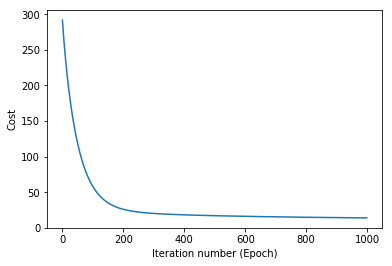

In [55]:
plt.plot(costs)
plt.xlabel("Iteration number (Epoch)")
plt.ylabel("Cost")
plt.show()

In [56]:
# Final predicted prices
new_hypotheses = hypothesis(trained_weights, trained_bias)

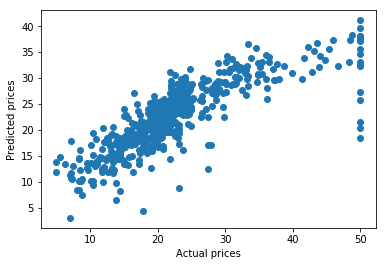

In [57]:
# Make sure predictions, actual values are correlated

plt.scatter(target, new_hypotheses)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

### Congrats! You just did machine learning

---

## Part 5: Using sklearn's built-in linear regression functionality:

In [58]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [59]:
## call the .fit() function on regr using data and target. Yes it's that easy:
##################################
regr.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

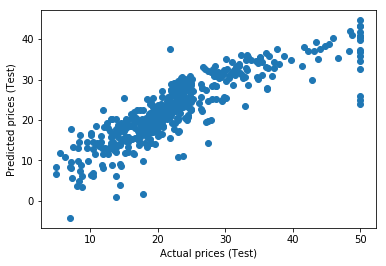

In [60]:
plt.scatter(target, regr.predict(data))
plt.xlabel("Actual prices (Test)")
plt.ylabel("Predicted prices (Test)")
plt.show()

## Train Test Split:
What we often do in machine learning is split our data into a training set and a testing set. This is so that once we train our model on our training set, we aren't making predictions on the same input, as that would give us "too-good" answers, so instead we put aside some data into a testing set and make predictions on that once we've trained our model


In [15]:
from sklearn.model_selection import train_test_split

## Using sklearn's train_test_split() function, create 4 variables X_train, X_test, Y_train, Y_test. 
## For function parameters, the test size will be 0.25, and the random_state will be 5. 
## Print each of these variables:


In [16]:
## use .fit() to train the regression model below


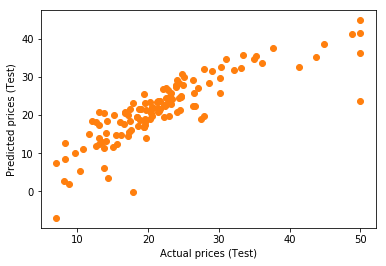

In [82]:
plt.scatter(Y_test, regr.predict(X_test))
plt.xlabel("Actual prices (Test)")
plt.ylabel("Predicted prices (Test)")
plt.show()